In [40]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Rasheli\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Rasheli\\AppData\\Local\\Temp\\pip-install-skqc7ur1\\tensorflow-gpu_02ae7c00e1b5440a98243693a032d071\\setup.py'"'"'; __file__='"'"'C:\\Users\\Rasheli\\AppData\\Local\\Temp\\pip-install-skqc7ur1\\tensorflow-gpu_02ae7c00e1b5440a98243693a032d071\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Rasheli\AppData\Local\Temp\pip-wheel-srnzxyu6'
       cwd: C:\Users\Rasheli\AppData\Local\Temp\pip-install-skqc7ur1\tensorflow-gpu_02ae7c00e1b5440a98243693a032d071\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    F

  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'



    The "tensorflow-gpu" package has been removed!
    
    Please install "tensorflow" instead.
    
    Other than the name, the two packages have been identical
    since TensorFlow 2.1, or roughly since Sep 2019. For more
    information, see: pypi.org/project/tensorflow-gpu
    
    
    ----------------------------------------
ERROR: Command errored out with exit status 1: 'C:\Users\Rasheli\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Rasheli\\AppData\\Local\\Temp\\pip-install-skqc7ur1\\tensorflow-gpu_02ae7c00e1b5440a98243693a032d071\\setup.py'"'"'; __file__='"'"'C:\\Users\\Rasheli\\AppData\\Local\\Temp\\pip-install-skqc7ur1\\tensorflow-gpu_02ae7c00e1b5440a98243693a032d071\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__,

In [41]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 

In [42]:
import tensorflow as tf
import os

snowballstemmer                    2.1.0
sortedcollections                  2.1.0
sortedcontainers                   2.4.0
soupsieve                          2.2.1
Sphinx                             4.2.0
sphinxcontrib-applehelp            1.0.2
sphinxcontrib-devhelp              1.0.2
sphinxcontrib-htmlhelp             2.0.0
sphinxcontrib-jsmath               1.0.1
sphinxcontrib-qthelp               1.0.3
sphinxcontrib-serializinghtml      1.1.5
sphinxcontrib-websupport           1.2.4
spyder                             5.1.5
spyder-kernels                     2.1.3
SQLAlchemy                         1.4.22
statsmodels                        0.12.2
sympy                              1.9
tables                             3.6.1
TBB                                0.2
tblib                              1.7.0
tensorboard                        2.12.2
tensorboard-data-server            0.7.0
tensorboard-plugin-wit             1.8.1
tensorflow-estimator               2.12.0
tensorflow-intel

In [43]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [44]:
tf.config.list_physical_devices('GPU')

[]

In [45]:
!pip install opencv-python
import cv2
import imghdr

In [46]:
data_dir = '../data' 

In [47]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [48]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [49]:
import numpy as np
from matplotlib import pyplot as plt

In [50]:
data = tf.keras.utils.image_dataset_from_directory('../data')

Found 664 files belonging to 2 classes.


In [51]:
data_iterator = data.as_numpy_iterator()

In [52]:
batch = data_iterator.next()

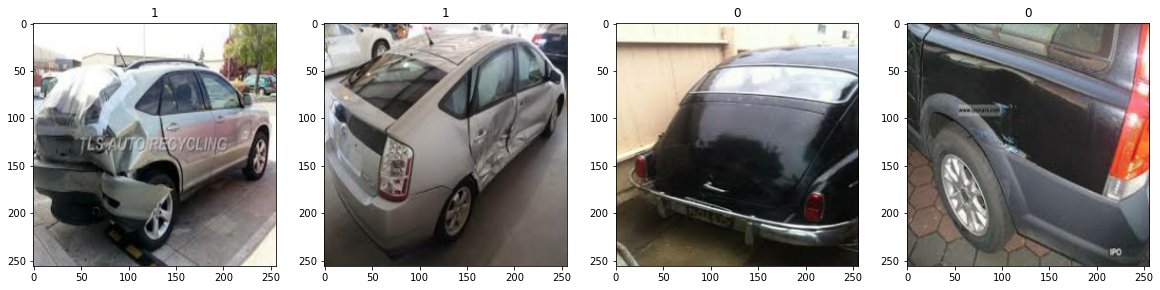

In [53]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [54]:
data = data.map(lambda x,y: (x/255, y))

In [55]:
data.as_numpy_iterator().next()

(array([[[[7.25490212e-01, 7.56862760e-01, 7.64705896e-01],
          [7.25559115e-01, 7.56931663e-01, 7.64774799e-01],
          [7.29526639e-01, 7.60899186e-01, 7.68742323e-01],
          ...,
          [6.81204021e-01, 7.00811863e-01, 7.12576568e-01],
          [6.55384481e-01, 6.74992323e-01, 6.86757028e-01],
          [6.31510437e-01, 6.51118279e-01, 6.62882984e-01]],
 
         [[7.25490212e-01, 7.56862760e-01, 7.64705896e-01],
          [7.25559115e-01, 7.56931663e-01, 7.64774799e-01],
          [7.29526639e-01, 7.60899186e-01, 7.68742323e-01],
          ...,
          [6.23106360e-01, 6.42714202e-01, 6.54478908e-01],
          [6.24894559e-01, 6.44502401e-01, 6.56267107e-01],
          [6.31334841e-01, 6.50942683e-01, 6.62707388e-01]],
 
         [[7.25490212e-01, 7.56862760e-01, 7.64705896e-01],
          [7.25559115e-01, 7.56931663e-01, 7.64774799e-01],
          [7.29526639e-01, 7.60899186e-01, 7.68742323e-01],
          ...,
          [5.92327774e-01, 6.11935616e-01, 6.2370

In [56]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [57]:
train_size

14

In [58]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [59]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [61]:
model = Sequential()

In [62]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [63]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [65]:
logdir='logs'


In [66]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [67]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
14/14 [==============================] - 10s 645ms/step - loss: 1.0426 - accuracy: 0.5112 - val_loss: 0.6670 - val_accuracy: 0.6406
Epoch 2/20
14/14 [==============================] - 10s 730ms/step - loss: 0.6863 - accuracy: 0.5647 - val_loss: 0.6474 - val_accuracy: 0.6016
Epoch 3/20
14/14 [==============================] - 11s 766ms/step - loss: 0.6417 - accuracy: 0.5848 - val_loss: 0.5838 - val_accuracy: 0.6562
Epoch 4/20
14/14 [==============================] - 11s 765ms/step - loss: 0.5912 - accuracy: 0.6830 - val_loss: 0.6035 - val_accuracy: 0.7422
Epoch 5/20
14/14 [==============================] - 11s 766ms/step - loss: 0.5092 - accuracy: 0.7455 - val_loss: 0.4547 - val_accuracy: 0.7734
Epoch 6/20
14/14 [==============================] - 11s 765ms/step - loss: 0.4202 - accuracy: 0.8170 - val_loss: 0.4274 - val_accuracy: 0.7891
Epoch 7/20
14/14 [==============================] - 11s 797ms/step - loss: 0.3271 - accuracy: 0.8728 - val_loss: 0.3096 - val_accuracy: 0.8750

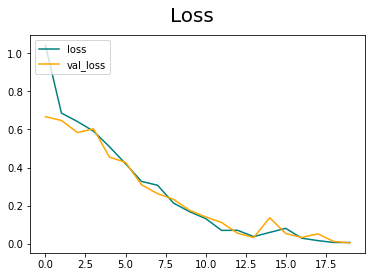

In [68]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

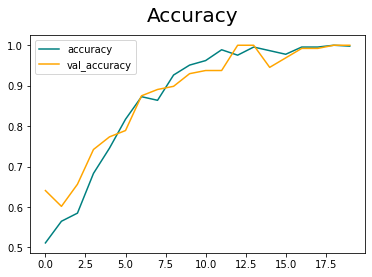

In [69]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [70]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [71]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [72]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 175ms/step


In [73]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [74]:
import cv2

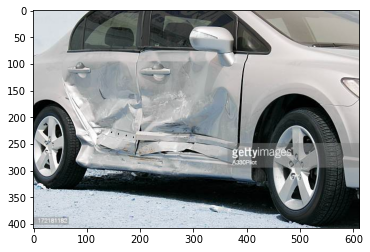

In [76]:
img = cv2.imread('../test_image.jpg')
plt.imshow(img)
plt.show()

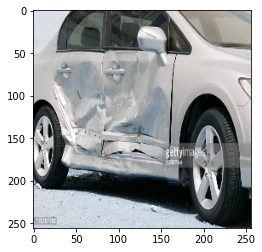

In [77]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [78]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 71ms/step


In [79]:
yhat

array([[0.99942523]], dtype=float32)

In [80]:
if yhat > 0.5: 
    print(f'Predicted class is server')
else:
    print(f'Predicted class is minor')

Predicted class is server


In [81]:
from tensorflow.keras.models import load_model

In [82]:
model.save(os.path.join('models','car-imageclassifier.h5'))

In [84]:
new_model = load_model('models/car-imageclassifier.h5')

In [87]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


array([[0.99942523]], dtype=float32)